In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
import pandas as pd
import numpy as np
import astropy.units as u
from datetime import date
from random import choices
from math import factorial, erf
from astroquery.simbad import Simbad
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter1d
from sklearn.neighbors import KernelDensity
from scipy.integrate import simps
from matplotlib.ticker import AutoMinorLocator

# sys.path.append('/Users/lib278/opt/anaconda3/envs/pyKLIP/lib/python3.9/site-packages/')

In [24]:
def make_cmap(colors, position, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    bit_rgb = np.linspace(0,1,256)
    # if position == None:
    #     position = np.linspace(0,1,len(colors))
    # else:
    if len(position) != len(colors):
        sys.exit("position length must be the same as colors")
    elif position[0] != 0 or position[-1] != 1:
        sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap
def choose_cmap(custom_cmap, reverse_cmap=False):

    custom_cmaps = {'my diverging red blue': [(204/255, 230/255, 255/255),
                                              (0/255, 102/255, 204/255),
                                              (51/255, 0/255, 102/255),
                                              (255/255, 0/255, 102/255),
                                              (255/255, 230/255, 243/255)],
                    'my blue yellow red': [(0 / 255, 74 / 255, 171 / 255),
                                        (255 / 255, 209 / 255, 26 / 255),
                                        (178 / 255, 0 / 255, 3 / 255)],
                    'McLaren 2022': [(0/255, 38/255, 77/255),
                                    (211/255, 0/255, 87/255),
                                    (255/255, 153/255, 0/255),
                                    (191/255, 217/255, 217/255)],
                    'vibrant candy': [(0/255, 26/255, 77/255),
                                    (204/255, 0/255, 102/255),
                                    (255/255, 204/255, 0/255),
                                    (153/255, 255/255, 153/255)],
                    'ice queen': [(37/255, 0/255, 51/255),
                                  (0/255, 155/255, 153/255),
                                  (214/255, 255/255, 214/255)],
                    'ice queen2': [(0/255, 0/255, 0/255),
                                   (0/255, 134/255, 179/255),
                                   (255/255, 255/255, 200/255)],
                    'amazon queen': [(0/255, 0/255, 0/255),
                                     (25/255, 103/255, 103/255),
                                     (119/255, 179/255, 105/255),
                                     (255/255, 234/255, 0/255),
                                     (255/255, 255/255, 255/255)],
                    'amazon queen2': [(0/255, 34/255, 51/255),
                                      (25/255, 103/255, 103/255),
                                    #   (119/255, 179/255, 105/255),
                                    #   (63/255, 211/255, 146/255),
                                      (255/255, 234/255, 0/255)],
                    'colorado sunrise': [(0/255, 17/255, 51/255),
                                         (234/255, 74/255, 104/255),
                                         (255/255, 224/255, 102/255)],
                    'muted rbg': [(102/255, 0/255, 51/255),
                                  (0/255, 85/255, 128/255),
                                  (140/255, 153/255, 0/255)],
                    'perceptual rbg': [(102/255, 0/255, 51/255),
                                       (60/255, 40/255, 90/255),
                                       (0/255, 102/255, 153/255),
                                       (134/255, 179/255, 0/255),
                                       (255/255, 200/255, 50/255),
                                       (255/255, 255/255, 160/255)],
                    'mclaren livery': [(0/255, 119/255, 179/255),
                                       (204/255, 0/255, 102/255),
                                    #    (255/255, 128/255, 0/255),
                                       (255/255, 153/255, 0/255),
                                       (207/255, 226/255, 226/255)],
                    'volcanic sunrise': [(0/255, 51/255, 77/255),
                                  (153/255, 0/255, 77/255),
                                  (255/255, 80/255, 80/255),
                                  (255/255, 255/255, 153/255)],
                    'cyber grape': [(51/255, 0/255, 51/255),
                                    (128/255, 0/255, 128/255),
                                    (153/255, 102/255, 255/255),
                                    (204/255, 255/255, 255/255)],
                    'cyber grape2': [(51/255, 0/255, 51/255),
                                     (128/255, 0/255, 128/255),
                                     (255/255, 153/255, 204/255),
                                     (204/255, 255/255, 255/255)],
                    'black limeaid': [(0/255, 0/255, 77/255),
                                      (102/255, 153/255, 153/255),
                                      (204/255, 255/255, 51/255)],
                    }

    chosen_cmap = custom_cmaps[custom_cmap]
    pos_diff = 1./(len(chosen_cmap)-1)
    positions = np.arange(0, 1+pos_diff, pos_diff)
    if reverse_cmap == True:
        chosen_cmap = chosen_cmap[::-1]
    mycolormap = make_cmap(chosen_cmap, position=positions)

    return mycolormap

plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')
# plt.rcParams.keys()

Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.


In [25]:
customSimbad = Simbad()
customSimbad.add_votable_fields('ra(2;A;ICRS;J2017.5;2000)', 'dec(2;D;ICRS;J2017.5;2000)',
                                'sp', 'sp_nature', 'sp_bibcode',
                                'flux(R)', 'flux(I)', 'flux(V)', 'flux(K)')
customSimbad.remove_votable_fields('coordinates')
customSimbad.TIMEOUT = 4 * 60 # sets the timeout to 4 min
customSimbad.ROW_LIMIT = -1

In [26]:
def unique(list_of_values):
    unique_values = []
    for _, value in enumerate(list_of_values):
        if value in unique_values:
            pass
        else:
            unique_values.append(value)
    return unique_values

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    
    try:
        window_size = np.abs(int(window_size))
        order = np.abs(int(order))
    except:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [5]:
primordial_disks_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/'
primordial_disks_sample_directory = primordial_disks_directory+'Tables/Condensed_Sample_By_Date/TestGrid/'
test_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/'
save_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/'

# os.system('mv ' + downloads_directory + goog_file_download + ' ' + primordial_disks_directory + goog_file_rename)


In [6]:
read_local = False

In [7]:
if read_local != True:
    today = date.today()
    date_str = today.strftime("%Y-%b-%d")

    sheet_url = "https://docs.google.com/spreadsheets/d/1xuMXHVTw3_iwn3tgzBoIaXaMP81ULbpIURthZyvs7iw/edit#gid=0"
    sheet_url_all_radii = "https://docs.google.com/spreadsheets/d/1R63WJN_77V66TMi-AwqUJ2acBxDhPjmZKgeWWvqdZOE/edit#gid=0"

    url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
    url_1_all_radii = sheet_url_all_radii.replace('/edit#gid=', '/export?format=csv&gid=')

    raw_df = pd.read_csv(url_1)
    raw_df_all_radii = pd.read_csv(url_1_all_radii)

else:
    date_str = '2023-Dec-9'
    raw_df = pd.read_excel(primordial_disks_directory + 'Primordial_Disks_9-Dec-2023.xlsx')

date_str

'2024-May-15'

In [8]:
targets_for_query = unique(raw_df['Target'].values)
len(targets_for_query)
targets = unique(raw_df['True Name'].values)
len(targets)


43

In [9]:
# save_csv_file = True
# if save_csv_file == True:
#     for file in os.listdir(primordial_disks_sample_directory):
#         if ('Primordial_Disks' in file) and (date_str not in file) and ('5x5' in file):
#             os.system('mv ' + primordial_disks_sample_directory + file + ' ' + primordial_disks_sample_directory + 'Old_Versions/' + file)

for fig_file in os.listdir(save_figures_directory):
    if ('.pdf' in fig_file) and (date_str not in fig_file):
        os.system('mv ' + save_figures_directory + fig_file + ' ' + test_figures_directory + 'Old/' + fig_file)


In [10]:
def standardize_uncertainties(targ_name, keyword, meas, meas_err, ulimit_flag=False):

    # possible_keywords = i pp disk (deg), vsini (km/s), Prot (d), Rstar (Rsun), Mstar (Msun)

    verbose = False  # [DONT FORGET TO SET WHICH KEYWORD YOU WANT TO PRINT IF YOU SET VERBOSE = TRUE]
    if verbose == True:
        if keyword == 'vsini (km/s)':
            print('-------------------------------------------')
            print(keyword)
        else:
            verbose = False

    # ----------------------------------------------------------------------------------
    if (len(meas) > 0) and (verbose == True):
        print('INPUT SET OF MEASURED VALUES AND UNCERTAINTIES:')
        for bep_i in range(len(meas)):
            print(meas[bep_i], meas_err[bep_i])
        print(' ')
    # ----------------------------------------------------------------------------------

    
    meas1 = []
    meas_err1 = []
    for meas_i in range(len(meas)):
        meas_val = meas[meas_i]
        err_val = meas_err[meas_i]
        if isinstance(meas_val, str) == True:
            if '>' in meas_val:
                meas_val = float('nan')
                err_val = float('nan')
            elif '<' in meas_val:
                if keyword == 'vsini (km/s)':
                    meas_val_split = meas_val.split('<')
                    meas_val = float(meas_val_split[-1])
                    err_val = 'ulimit'
                else:
                    meas_val = float('nan')
                    err_val = float('nan')
            elif '-' in meas_val:
                meas_val_split = meas_val.split('-')
                meas_val_limits = [float(parval) for parval in meas_val_split]
                meas_val = np.nanmean(meas_val_limits) 
                err_val = np.nanmean(meas_val_limits) - np.nanmin(meas_val_limits)
            else:
                meas_val = float(meas_val)

        elif np.isnan(meas_val) == True:
            continue
            # err_val = float('nan')
        
        if keyword == 'i pp disk (deg)':
            if type(meas_val) != str:
                if meas_val > 90:
                    meas_val = abs(meas_val - 180)
                if meas_val < 0:
                    meas_val = abs(meas_val)

        meas1.append(meas_val)
        meas_err1.append(err_val)

    if len(np.where(np.array(meas1) > 0)[0]) == 0:
        return [], []


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas1) > 0:
            for bep1_i in range(len(meas1)):
                print(meas1[bep1_i], meas_err1[bep1_i])
        print('  ')
    # ----------------------------------------------------------------------------------


    meas2 = []
    meas_err2 = []
    for meas1_i in range(len(meas1)):
        meas1_val = meas1[meas1_i]
        err1_val = meas_err1[meas1_i]
        if type(err1_val) == str:
            if err1_val == '-':
                err1_val = float('nan')
            elif ',' in err1_val:
                err1_val_split = err1_val.split(',')
                err1_val_limits = [float(parval) for parval in err1_val_split]
                # err1_val = np.nanmax(err1_val_limits)
                err1_val = np.nanmean(err1_val_limits)
        
        meas2.append(meas1_val)
        if err1_val != 'ulimit':
            meas_err2.append(float(err1_val))
        else:
            meas_err2.append(err1_val)


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('UNCERTAINTIES NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas2) > 0:
            for bep2_i in range(len(meas2)):
                print(meas2[bep2_i], meas_err2[bep2_i])
        print(' ')
    # ----------------------------------------------------------------------------------


    meas3 = []
    meas_err3 = []

    ten_percent_uncertainty_flag = 0

    if len(meas2) > 0:
        meas_with_nan_unc = []
        for meas2_i in range(len(meas2)):
            if meas_err2[meas2_i] == 'ulimit':
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == False):
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == True):
                meas_with_nan_unc.append(meas2[meas2_i])
        if len(meas_with_nan_unc) > 1:
            mean_meas2 = np.mean(meas_with_nan_unc)
            std_meas2 = np.std(meas_with_nan_unc, ddof=1)
            meas3.append(mean_meas2)
            meas_err3.append(std_meas2)
        # IF THERE IS ONLY ONE MEASUREMENT WITH NO UNCERTAINTY, ADOPT 5% UNCERTAINTY FOR VSINI, 16% FOR RSTAR, 10% FOR PROT, AND 10% FOR ALL ELSE
        if (len(meas_with_nan_unc) == 1) and (len(meas3) == 0):
            meas3.append(meas2[0])
            if keyword == 'vsini (km/s)':
                meas_err3.append(0.05 * meas2[0])
            elif keyword == 'Rstar (Rsun)':
                meas_err3.append(0.16 * meas2[0])
                ten_percent_uncertainty_flag = 1
            elif keyword == 'Prot (d)':
                meas_err3.append(0.10 * meas2[0])
                ten_percent_uncertainty_flag = 1
            else:
                meas_err3.append(0.10 * meas2[0])


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS WITHOUT UNCERTAINTIES NOW COMBINED. IF ONLY 1 AMONG SEVERAL, IT HAS BEEN REMOVED')
        if len(meas3) > 0:
            for bep3_i in range(len(meas3)):
                print(meas3[bep3_i], meas_err3[bep3_i])
            print(' ')
    # ----------------------------------------------------------------------------------


    # IMPOSE LOWER LIMIT OF 5% UNCERTAINTY FOR VSINI VALUES (AND ONLY VSINI VALUES)
    meas4 = []
    meas_err4 = []
    if len(meas3) > 0:
        if keyword == 'vsini (km/s)':
            for meas3_i in range(len(meas3)):
                if meas_err3[meas3_i] == 'ulimit':
                    meas4.append(meas3[meas3_i])
                    meas_err4.append(meas_err3[meas3_i])
                elif meas_err3[meas3_i] >= 0.05 * meas3[meas3_i]:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(meas_err3[meas3_i]))
                else:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(0.05 * meas3[meas3_i]))
                    # print('Updated reported uncertainty to minimum value')
        else:
            for meas3_i in range(len(meas3)):
                meas4.append(float(meas3[meas3_i]))
                meas_err4.append(float(meas_err3[meas3_i]))


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('VSINI LIMIT ON UNCERTAINTY NOW IMPOSED:')
        if len(meas4) > 0:
            for bep4_i in range(len(meas4)):
                print(meas4[bep4_i], meas_err4[bep4_i])
            print(' ')
    # ----------------------------------------------------------------------------------



    meas5 = []
    meas_err5 = []
    if len(meas4) > 0:
        for meas4_i in range(len(meas4)):
            if meas_err4[meas4_i] == 'ulimit':
                meas5.append(meas4[meas4_i])
                meas_err5.append(meas_err4[meas4_i])
            elif (np.isnan(meas4[meas4_i]) == False) and (np.isnan(meas_err4[meas4_i]) == False):
                meas5.append(meas4[meas4_i])
                meas_err5.append(meas_err4[meas4_i])
    

    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('FINAL SET OF MEASURED VALUES AND UNCERTAINTIES:')
        if len(meas5) > 0:
            for bep5_i in range(len(meas5)):
                print(meas5[bep5_i], meas_err5[bep5_i])
            print('-------------------------------------------')
    # ----------------------------------------------------------------------------------

    

    return meas5, meas_err5, ten_percent_uncertainty_flag


In [11]:
def determine_sptype(letters, numbers):

    possible_letters = ['B', 'A', 'F', 'G', 'K', 'M']

    full_del1 = []
    full_del1_std = []
    for let_i in range(len(letters)):
        let_val = letters[let_i]
        num_val = numbers[let_i]
        # print('let_val: ', let_val)
        if isinstance(let_val, str) == True:
            # Determine if a specral type exists for this star. If not, return nans
            if (let_val == '-') and (num_val == '-'):
                return [float('nan')], [float('nan')]
            elif '+' in let_val:
                is_binary = True
                return [float('nan')], [float('nan')]
            elif '-' in let_val:
                let_val_split = str(let_val).split('-')
                num_val_split = str(num_val).split('-')
                temp_full_del = []
                for let_j in range(len(let_val_split)):
                    let_val_space_removed = let_val_split[let_j].replace(' ','')
                    for poss_let in range(len(possible_letters)):
                        if possible_letters[poss_let] == let_val_space_removed:
                            temp_del = poss_let
                            break
                    temp_num = float(num_val_split[let_j].replace(' ',''))
                    if temp_num == '?':
                        temp_num = 5.
                    temp_full_del.append(temp_del + 0.1*temp_num)
                mean_full_del = np.mean(temp_full_del)
                std_full_del = np.std(temp_full_del, ddof=1)

                full_del1.append(mean_full_del)
                full_del1_std.append(std_full_del)
            else:
                let_val_space_removed = let_val.replace(' ','')
                for poss_let in range(len(possible_letters)):
                    if possible_letters[poss_let] == let_val_space_removed:
                        let_del = poss_let
                        break
                if num_val == '?':
                    num_val = 5.
                full_del1.append(let_del + 0.1*float(num_val))
                full_del1_std.append(float('nan'))
        else:
            continue

    # print('full_del1')
    # print(full_del1, full_del1_std)

    full_del2 = []
    full_del2_std = []

    full_del2_no_std = []
    for del1_i in range(len(full_del1)):
        if np.isnan(full_del1_std[del1_i]) == True:
            full_del2_no_std.append(full_del1[del1_i])
        else:
            full_del2.append(full_del1[del1_i])
            full_del2_std.append(full_del1_std[del1_i])
    if len(full_del2_no_std) == 1:
        full_del2.append(full_del2_no_std[0])
        full_del2_std.append(1e-4)
    if len(full_del2_no_std) == 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(0.5*abs(full_del1[1] - full_del1[0]))
    if len(full_del2_no_std) > 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(np.nanstd(full_del1))
            
    
    # print('full_del2')
    # print(full_del2, full_del2_std)
    
    
    return full_del2, full_del2_std


In [12]:
def weighted_mean(meas, meas_err):
    try:
        weight = 1./(np.array(meas_err)**2)
    except:
        print('Error calculating weighted mean!')
        print(meas, ',', meas_err)
    else:
        w_mean = sum(weight * np.array(meas)) / sum(weight)
        w_mean_err = 1./np.sqrt(sum(weight))

    return w_mean, w_mean_err

In [13]:
def i_unc(x, PDF):
    CDF = []
    for x_i in range(len(x)):
        CDF.append(np.trapz(PDF[0:x_i], x[0:x_i]))

    # plt.plot(x, CDF)

    where_peak = np.where(PDF == max(PDF))[0][0]
    sig1_perc = 1 - 0.6826
    sig2_perc = 1 - 0.9544
    sig1_sub = abs(np.array(CDF) - sig1_perc)
    sig2_sub = abs(np.array(CDF) - sig2_perc)

    where_sig1 = np.where(sig1_sub == min(sig1_sub))[0]
    where_sig2 = np.where(sig2_sub == min(sig2_sub))[0]
    sig1 = x[where_peak] - x[where_sig1]
    sig2 = x[where_peak] - x[where_sig2]

    if len(sig1) > 1:
        sig1 = float('nan')
        sig2 = float('nan')
    else:
        sig1 = sig1[0]
        sig2 = sig2[0]

    return sig1, sig2

def sigfig(value, uncertainty, return_uncertainty=True, cutoff=35):
    exp = np.floor(np.log10(uncertainty))
    if uncertainty / 10**(exp - 1) < cutoff:
        exp -= 1
    
    exp *= -1
    exp = int(exp)

    value_rounded = round(value, exp)

    # needed to avoid -0.0 being printed in table
    value_rounded_str = str(value_rounded)
    value_rounded_str_only_digits = value_rounded_str.replace('.', '').replace('-', '')
    if value_rounded_str.find('-') != -1 and value_rounded_str_only_digits == len(value_rounded_str_only_digits) * '0':
        value_rounded *= -1

    uncertainty_rounded = round(uncertainty, exp)
    
    if uncertainty_rounded < cutoff / 10:
        # in this case, exp represents number of decimal places to include
        output_tuple = f"{value_rounded:.{exp}f}", f"{uncertainty_rounded:.{exp}f}"
        return output_tuple if return_uncertainty else output_tuple[0]
    else:
        output_tuple = f"{int(value_rounded)}", f"{int(uncertainty_rounded)}"
        return output_tuple if return_uncertainty else output_tuple[0]

def quantile(x, q, weights=None):
    """
    Compute sample quantiles with support for weighted samples.
    Note
    ----
    When ``weights`` is ``None``, this method simply calls numpy's percentile
    function with the values of ``q`` multiplied by 100.
    Parameters
    ----------
    x : array_like[nsamples,]
       The samples.
    q : array_like[nquantiles,]
       The list of quantiles to compute. These should all be in the range
       ``[0, 1]``.
    weights : Optional[array_like[nsamples,]]
        An optional weight corresponding to each sample. These
    Returns
    -------
    quantiles : array_like[nquantiles,]
        The sample quantiles computed at ``q``.
    Raises
    ------
    ValueError
        For invalid quantiles; ``q`` not in ``[0, 1]`` or dimension mismatch
        between ``x`` and ``weights``.
    """
    x = np.atleast_1d(x)
    q = np.atleast_1d(q)

    if np.any(q < 0.0) or np.any(q > 1.0):
        raise ValueError("Quantiles must be between 0 and 1")
    
    if weights is None:
        return np.percentile(x, list(100.0 * q))
    else:
        weights = np.atleast_1d(weights)
        if len(x) != len(weights):
            raise ValueError("Dimension mismatch: len(weights) != len(x)")
        idx = np.argsort(x)
        sw = weights[idx]
        cdf = np.cumsum(sw)[:-1]
        cdf /= cdf[-1]
        cdf = np.append(0, cdf)
        return np.interp(q, cdf, x[idx]).tolist()

def median_pm_confidence_interval(x, pdf_y, sigma=0.6826):
    """
    Calculates output for median +- 1 sigma column.
    Parameters
    ----------
    par_chain : array_like
        Array of parameter
    sigma_per : float, optional
        Area under +- 1 sigma
    
    Returns
    -------
    str : Latex expression to go in final table
    """
    lower_bound, median, upper_bound = quantile(x, [0.5 - sigma / 2, 0.5, 0.5 + sigma / 2], pdf_y)

    if np.isnan(median) == False:
        lower_sig = abs(median - lower_bound)
        upper_sig = abs(upper_bound - median)
    else:
        median = float('nan')
        lower_sig = float('nan')
        upper_sig = float('nan')

    # if median == 0.:
    #     lower_sig = 0
    # elif lower_sig > mode:
    #     lower_sig = mode
    # if median == 90:
    #     upper_sig = 0
    # elif upper_sig > 90 - mode:
    #     upper_sig = 90 - mode

    return median, lower_sig, upper_sig

def mode_pm_highest_density_interval(x, pdf_y, sigma):
    # 1sigma makes sigma = 0.6826

    cdf_y = np.cumsum(pdf_y)
    cdf_y = cdf_y / cdf_y[-1]  # Normalize the cdf so that it sums to 1.

    delta_xlist = []
    xlower = []
    xupper = []

    sigma_lower = 0
    delta = 1e-6

    for _ in range(0,round((1 - sigma)/delta)):
        x1 = np.interp(sigma_lower,cdf_y,x)
        xu = np.interp(sigma,cdf_y,x)
        delta_xlist.append(xu-x1)
        xlower.append(x1)
        xupper.append(xu)
        sigma += delta
        sigma_lower += delta

    index = delta_xlist.index(min(delta_xlist))
    mode = np.mean(x[pdf_y == max(pdf_y)]).round(1)
    # print('The mode is ', mode)
    # print('The lower x value (for minimum credible interval) is ', xlower[index])
    # print('The upper x value (for minimum credible interval) is ', xupper[index])

    lower = mode - xlower[index]
    upper = xupper[index] - mode

    return mode, lower, upper



In [14]:
def condense_target_data(df, systematic_Rshift, systematic_Pshift, save_posteriors_dir, save_date, targs='all', resolution='low', which_radii='stassun', print_stuff=False):
    parameter_value_columns = ['SpType', 'i pp disk (deg)', 'Rstar (Rsun)', 'Mstar (Msun)', 'Prot (d)', 'vsini (km/s)', 'Teff (K)', 'Age (Myr)']
    parameter_err_columns = ['SpType Unc', 'i pp disk Unc', 'Rstar Unc', 'Mstar Unc', 'Prot Unc', 'vsini Unc', 'Teff Unc', 'Age Unc']
    condensed_data = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    for col_i, column in enumerate(parameter_value_columns):
        condensed_data[column] = []
        condensed_data[parameter_err_columns[col_i]] = []
    
    if targs == 'all':
        targets = unique(df['True Name'].values)
    else:
        targets = [targs]

    for _, target in enumerate(targets):
        
        temporary_df = df[df['True Name'] == target]

        multiplicity_flags = temporary_df['Multiplicity'].values
        multiplicity_flag = False
        for m_val in multiplicity_flags:
            if isinstance(m_val, str) == True:
                multiplicity_flag = True
                break
        if multiplicity_flag == True:
            print('Skipping Multiple Star System: ' + target)
            continue

        condensed_data['Target'].append(target)
        condensed_data['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data['RA'].append(temporary_df['RA'].values[0])
        condensed_data['DEC'].append(temporary_df['Dec'].values[0])
        for parcol_i, parameter in enumerate(parameter_value_columns):
            # if parcol_i == 0:  # CONDITIONAL FOR TESTING
            parameter_values = temporary_df[parameter].values
            if len(parameter_values) > 0:
                
                w_mean_val, w_mean_err = float('nan'), float('nan')  # initialize these so the ide doesn't yell at us

                if parameter == 'SpType':
                    sptype_letter = temporary_df['SpType Letter'].values
                    sptype_number = temporary_df['SpType Number'].values
                    standardized_vals, standardized_errs = determine_sptype(letters=sptype_letter, numbers=sptype_number)
                else:
                    parameter_values = temporary_df[parameter].values
                    parameter_errs = temporary_df[parameter_err_columns[parcol_i]].values
                    standardized_vals, standardized_errs, ten_percent_uncertainty = standardize_uncertainties(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs)
                        
                if len(standardized_vals) == 0:
                    w_mean_val, w_mean_err = float('nan'), float('nan')

                elif len(standardized_vals) == 1:
                    w_mean_val, w_mean_err = standardized_vals[0], standardized_errs[0]

                elif len(standardized_vals) > 1:
                    w_mean_val, w_mean_err = weighted_mean(meas=standardized_vals, meas_err=standardized_errs)

                
                if (parameter == 'Rstar (Rsun)') and (which_radii == 'stassun'):
                    if temporary_df['Rstar Reference'].values[0] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':  # Stassun Radius
                        w_mean_err = np.sqrt(w_mean_err**2 + (0.07*w_mean_val)**2)
                    elif temporary_df['Rstar Reference'].values[0] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':  # Yu Radius
                        w_mean_err = np.sqrt(w_mean_err**2 + (0.049*w_mean_val)**2)

                    w_mean_val *= systematic_Rshift
                    w_mean_err *= systematic_Rshift

                # If the measured rotation period doesn't already have a forced 10% uncertainty, then inflate by adding the error associated with the star's shear in quadrature
                if parameter == 'Prot (d)':
                    absolute_shear = 0.07  # rad / day
                    err_shear = 0.5*(w_mean_val - ((absolute_shear/(2*np.pi)) + (1./w_mean_val))**-1)
                    w_mean_err = np.sqrt(w_mean_err**2 + err_shear**2)

                    w_mean_val *= systematic_Pshift
                    w_mean_err *= systematic_Pshift
                    

                condensed_data[parameter].append(w_mean_val)
                condensed_data[parameter_err_columns[parcol_i]].append(w_mean_err)
            
            if len(parameter_values) == 0:
                condensed_data[parameter].append(float('nan'))
                condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))

    condensed_data_df = pd.DataFrame(condensed_data)









    

    if resolution == 'high':
        n_draws = int(5e7)
        sampling_res = 0.2
    elif resolution == 'med':
        n_draws = int(1e6)
        sampling_res = 0.5
    else:
        n_draws = int(1e4)
        sampling_res = 1
    
    istars = np.arange(0, 90+sampling_res, sampling_res)
    i_bins = np.concatenate((istars, np.array([istars[-1] + sampling_res])))

    istar = []
    istar_err_p = []
    istar_err_m = []
    idiff = []
    idiff_err_p = []
    idiff_err_m = []
    eq_vel = []
    eq_vel_err = []
    for targ_i in range(len(condensed_data_df['Target'].values)):
        # if print_stuff == True:
        #     print(condensed_data_df['Target'].values[targ_i])

        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i STAR PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        vsini = condensed_data_df['vsini (km/s)'].values[targ_i]
        sigma_vsini = condensed_data_df['vsini Unc'].values[targ_i]

        Prot = (condensed_data_df['Prot (d)'].values[targ_i] * u.d).to(u.s).value
        sigma_Prot = (condensed_data_df['Prot Unc'].values[targ_i] * u.d).to(u.s).value
        
        Rstar = (condensed_data_df['Rstar (Rsun)'].values[targ_i] * u.Rsun).to(u.km).value
        sigma_Rstar = (condensed_data_df['Rstar Unc'].values[targ_i] * u.Rsun).to(u.km).value

        veq = (2 * np.pi * Rstar)/(Prot)
        sigma_veq = veq * np.sqrt((sigma_Rstar/Rstar)**2 + (sigma_Prot/Prot)**2)

        sini = np.sin(np.radians(istars))

        if sigma_vsini != 'ulimit':
            part1 = vsini - veq * sini
            part2 = 2 * (sigma_vsini**2 + sigma_veq**2 * sini**2)
            i_star_dist = sini * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
        else:
            i_star_dist_list = []
            for sini_element in range(len(sini)):
                part1 = vsini - veq * sini[sini_element]
                part2 = np.sqrt(2) * sigma_veq * sini[sini_element]
                part3 = np.sqrt(2) * np.pi * Rstar
                part4 = sigma_veq * Prot
                istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))
                i_star_dist_list.append(istar_element)
            i_star_dist = np.array(i_star_dist_list)

        istars = istars[np.isnan(i_star_dist) == False]
        i_star_dist = i_star_dist[np.isnan(i_star_dist) == False]

        # -------------------------------- i STAR UNCERTAINTY --------------------------------- #
        i_star_MAP, sig1_i_star_m, sig1_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.6826)
        _, sig2_i_star_m, sig2_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.9540)




        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i DISK PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        i_disk_dist_unnormalized = 1.0 / (np.sqrt(2.0 * np.pi) * condensed_data_df['i pp disk Unc'].values[targ_i]) * np.exp(-np.power((istars - condensed_data_df['i pp disk (deg)'].values[targ_i]) / condensed_data_df['i pp disk Unc'].values[targ_i], 2.0) / 2)
        i_disk_dist = i_disk_dist_unnormalized / (np.sum(i_disk_dist_unnormalized) * sampling_res)

        # -------------------------------- i DISK UNCERTAINTY --------------------------------- #
        i_disk_MAP, sig1_i_disk_m, sig1_i_disk_p = condensed_data_df['i pp disk (deg)'].values[targ_i], condensed_data_df['i pp disk Unc'].values[targ_i], condensed_data_df['i pp disk Unc'].values[targ_i]
        _, sig2_i_disk_m, sig2_i_disk_p = condensed_data_df['i pp disk (deg)'].values[targ_i], 2 * condensed_data_df['i pp disk Unc'].values[targ_i], 2 * condensed_data_df['i pp disk Unc'].values[targ_i]




        # ------------------------------------------------------------------------------------- #
        # --------------------- COMPUTE DELTA i PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        i_disk_rand = choices(istars, i_disk_dist, k=n_draws)
        i_star_rand = choices(istars, i_star_dist, k=n_draws)
        i_diff_rand = abs(np.array(i_disk_rand) - i_star_rand)

        bin_vals_i_diff, _ = np.histogram(i_diff_rand, bins=i_bins)  # , density=True)

        smooth_on = True
        if smooth_on == True:
            smooth_over_deg = 1
            smooth_over_points = int(smooth_over_deg/sampling_res)
            if np.mod(smooth_over_points,2) == 0:
                smooth_over_points += 1
            smooth_vals_i_diff = gaussian_filter1d(bin_vals_i_diff, smooth_over_points)
            i_diff_dist = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * sampling_res)
        else:
            i_diff_dist = bin_vals_i_diff/ (sum(bin_vals_i_diff) * sampling_res)

        # -------------------------------- DELTA i UNCERTAINTY --------------------------------- #
        i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.6826)
        _, sig2_i_diff_m, sig2_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.9540)



        # -------------------------------- SAVE STUFF --------------------------------- #
        target_str = condensed_data['Simbad Name'][targ_i].replace(' ', '')
        if '/' in condensed_data['Simbad Name'][targ_i]:
            target_str = target_str.replace('/', '-')
        probability_densities = pd.DataFrame({'i (deg)':  istars,
                                                'P(i Disk | d)': i_disk_dist,
                                                'P(i Star | d)': i_star_dist,
                                                'P(Delta i | d)': i_diff_dist,
                                                'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                'i Star MAP' : [i_star_MAP]*len(istars),
                                                'i Star -Unc1' : [sig1_i_star_m]*len(istars),
                                                'i Star +Unc1' : [sig1_i_star_p]*len(istars),
                                                'i Star -Unc2' : [sig2_i_star_m]*len(istars),
                                                'i Star +Unc2' : [sig2_i_star_p]*len(istars),
                                                'Delta i MAP' : [i_diff_MAP]*len(istars),
                                                'Delta i -Unc1' : [sig1_i_diff_m]*len(istars),
                                                'Delta i +Unc1' : [sig1_i_diff_p]*len(istars),
                                                'Delta i -Unc2' : [sig2_i_diff_m]*len(istars),
                                                'Delta i +Unc2' : [sig2_i_diff_p]*len(istars),
                                                })
        
        Rshift_text = 'Rshift' + str(systematic_Rshift)
        Pshift_text = 'Pshift' + str(systematic_Pshift)

        csv_save_text = save_posteriors_dir + 'Posteriors_5x5_' + target_str + '_' + Rshift_text + '_' + Pshift_text + '_' + save_date + '.csv'

        probability_densities.to_csv(csv_save_text, index=False)





        # # -------------------------------- PRINT STUFF --------------------------------- #
        # if print_stuff == True:
        #     print('i_disk: {:.2f} -/+{:.2f} '.format(i_disk_MAP, sig1_i_disk_p))
        #     print('i_star: {:.2f} -{:.2f} +{:.2f}'.format(i_star_MAP, sig1_i_star_m, sig1_i_star_p))
        #     print('i_diff: {:.2f} -{:.2f} +{:.2f}\n'.format(i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p))

        istar.append(i_star_MAP)
        istar_err_p.append(sig1_i_star_p)
        istar_err_m.append(sig1_i_star_m)
        idiff.append(i_diff_MAP)
        idiff_err_p.append(sig1_i_diff_p)
        idiff_err_m.append(sig1_i_diff_m)
        eq_vel.append(veq)
        eq_vel_err.append(sigma_veq)
    
    condensed_data_df['i star (deg)'] = istar
    condensed_data_df['i star +Unc'] = istar_err_p
    condensed_data_df['i star -Unc'] = istar_err_m
    condensed_data_df['disk diff'] = idiff
    condensed_data_df['disk diff +Unc'] = idiff_err_p
    condensed_data_df['disk diff -Unc'] = idiff_err_m
    condensed_data_df['Veq'] = eq_vel
    condensed_data_df['Veq Unc'] = eq_vel_err

    return condensed_data_df

In [15]:
plot_variables = ['SpT', 'disk diff', 'star inclination']
possible_variables = ['star inclination', 'disk inclination', 'mass', 'Teff', 'SpT', 'disk diff', 'Prot', 'Age', 'vsini', 'radius']

Sptype_cutoff = 3.75
colormap = choose_cmap('cyber grape', reverse_cmap=False)  # choose_cmap('volcanic sunrise', reverse_cmap=True)

In [16]:
# raw_df = raw_df[raw_df.index >= 264]
# raw_df
# raw_df = raw_df[(raw_df.index >= 251) & ((raw_df.index <= 264))]
# raw_df

In [17]:

# ------------- SET SAMPLING RATE ------------- #
sampling_resolution = 'high'
resolution_text = sampling_resolution + 'Res'

date_str = '2024-May-15'

if sampling_resolution == 'high':
    distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/TestGrid/High/'
if sampling_resolution == 'med':
    distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/TestGrid/Med/'
if sampling_resolution == 'low':
    distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/TestGrid/Low/'

nominal_kde_file = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/KDE_' + sampling_resolution + 'Res_Rshift1_Pshift1_' + date_str + '.csv'
nominal_condensed_file = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/adopted_' + sampling_resolution + 'Res_' + date_str + '.csv'

# R_shifts = np.array([0.5, 0.75, 1.0, 1.25, 1.5])[::-1]
# P_shifts = np.array([0.5, 0.75, 1.0, 1.25, 1.5])

# R_shifts = np.array([0.6, 0.8, 1.0, 1.2, 1.4])[::-1]
# P_shifts = np.array([0.6, 0.8, 1.0, 1.2, 1.4])

R_shifts = np.array([0.7, 0.85, 1.0, 1.15, 1.3])[::-1]
P_shifts = np.array([0.7, 0.85, 1.0, 1.15, 1.3])

nominal_axnums = [5, 9, 13, 17, 21]

target_labels_on = False
font_size = 14

# ------------- SAVE THE FIGURE? ------------- #

save_final_figure = True



# ------------- PLOT SPECIAL AXES? ------------- # 

plot_special_axis = False

if plot_special_axis == True:
    save_final_figure = False  # Override save figure
    special_axes = [11, 12, 13]
else:
    special_axes = []



# ------------- CREATE LIGHT VERSION? ------------- #
plot_lightfigure = False
plot_transparent = False

if plot_lightfigure == True:
    edge_color = '#b3d9ff'  # par vs. Delta i 
    plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle_light.mplstyle')
else:
    edge_color = '#005580'  # par vs. Delta i 
    plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')

if plot_lightfigure == True:
    light_or_dark_dext = 'lightVersion'
else:
    light_or_dark_dext = 'darkVersion'

# ------------- MAKE TRANSPARENT? ------------- #
if plot_transparent == True:
    transparent_text = 'transparent'
else:
    transparent_text = 'opaque'



Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.


In [18]:
# compute_new_posteriors = False

# save_csv_file = True
# if compute_new_posteriors == False:
#     save_csv_file = False


# axnum = 0

# figure_width = 11.9
# figure_height = 11.25


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  1


mv: rename /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/TestGrid/Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift0.7_2024-May-10.csv to /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/TestGrid/Old_Versions/Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift0.7_2024-May-10.csv: No such file or directory
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  2


mv: rename /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/TestGrid/Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift0.85_2024-May-10.csv to /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/TestGrid/Old_Versions/Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift0.85_2024-May-10.csv: No such file or directory
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  3


mv: rename /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/TestGrid/Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift1.0_2024-May-10.csv to /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/TestGrid/Old_Versions/Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift1.0_2024-May-10.csv: No such file or directory
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  4


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  6


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  7


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  8


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  10


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  11


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  12


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  13
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  14


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  15


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  16


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  17
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  18


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  19


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  20


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  21
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  22


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  23


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  24


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  25


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/79352422.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_98564/1993753497.py:561: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(cbar_ticks, fontsize=1.1*font_size_5x5)


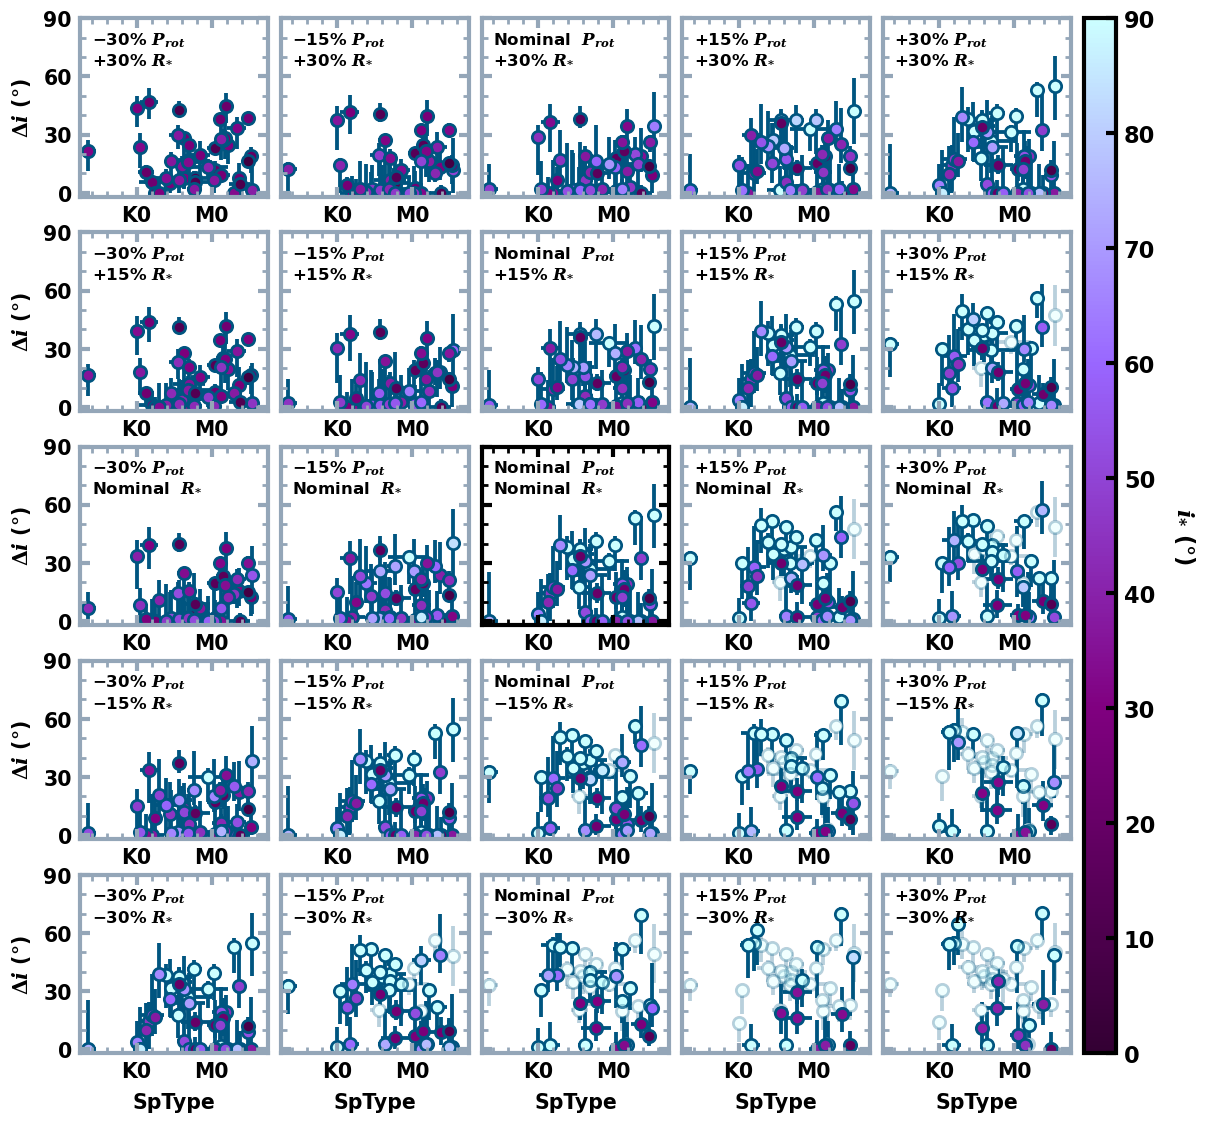

In [19]:
compute_new_posteriors = True

save_csv_file = True
if compute_new_posteriors == False:
    save_csv_file = False


axnum = 0

figure_width = 11.9
figure_height = 11.25

fig = plt.figure(figsize=(figure_width, figure_height))
gs = gridspec.GridSpec(5, 6, width_ratios=[1, 1, 1, 1, 1, 0.17])  # , wspace=0.17, hspace=0.17)
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(5) for jj in range(5)]


font_size_5x5 = 1.05*font_size

non_physicals = []



for R_shift in R_shifts:
    for P_shift in P_shifts:
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('axnum: ', int(axnum+1))

        non_physicals_temporary = []

        Rshift_text = 'Rshift' + str(R_shift)
        Pshift_text = 'Pshift' + str(P_shift)
    
        if plot_special_axis == True:
            if axnum not in special_axes:
                axnum += 1
                continue
        
        ax = axes[axnum]

        ax.minorticks_on()

        if 'star inclination' in plot_variables:
            axis_bool = [index for index in range(len(plot_variables)) if 'star inclination' in plot_variables[index]][0]
            if axis_bool == 0:
                x_column = 'i star (deg)'
                x_column_err_p = 'i star -Unc'
                x_column_err_m = 'i star +Unc'
                x_label = r'$i_{*}$ ($\degree$)'
                x_text = 'i_Star'
                xlims = [0, 95]
            if axis_bool == 1:
                y_column = 'i star (deg)'
                y_column_err_p = 'i star -Unc'
                y_column_err_m = 'i star +Unc'
                y_label = r'$i_{*}$ ($\degree$)'
                ylims = [0, 95]
                y_text = 'i_Star'
            if axis_bool == 2:
                z_column = 'i star (deg)'
                z_column_err_p = 'i star -Unc'
                z_column_err_m = 'i star +Unc'
                z_label = r'$i_{*}$ ($\degree$)'
                zlims = [0, 90]
                z_text = 'i_Star'
        if 'disk inclination' in plot_variables:
            axis_bool = [index for index in range(len(plot_variables)) if 'disk inclination' in plot_variables[index]][0]
            if axis_bool == 0:
                x_column = 'i pp disk (deg)'
                x_column_err_p = 'i pp disk Unc'
                x_column_err_m = 'i pp disk Unc'
                x_label = r'$i_{disk}$ ($\degree$)'
                xlims = [0, 95]
                x_text = 'i_Disk'
            if axis_bool == 1:
                y_column = 'i pp disk (deg)'
                y_column_err_p = 'i pp disk Unc'
                y_column_err_m = 'i pp disk Unc'
                y_label = r'$i_{disk}$ ($\degree$)'
                ylims = [0, 95]
                y_text = 'i_Disk'
            if axis_bool == 2:
                z_column = 'i pp disk (deg)'
                z_column_err_p = 'i pp disk Unc'
                z_column_err_m = 'i pp disk Unc'
                z_label = r'$i_{disk}$ ($\degree$)'
                zlims = [0, 90]
                z_text = 'i_Disk'
        if 'mass' in plot_variables:
            axis_bool = [index for index in range(len(plot_variables)) if 'mass' in plot_variables[index]][0]
            if axis_bool == 0:
                x_column = 'Mstar (Msun)'
                x_column_err_p = 'Mstar Unc'
                x_column_err_m = 'Mstar Unc'
                x_label = r'$M_{*}$ ($M_{\odot}$)'
                xlims = [0.15, 2]
                x_text = 'Mstar'
            if axis_bool == 1:
                y_column = 'Mstar (Msun)'
                y_column_err_p = 'Mstar Unc'
                y_column_err_m = 'Mstar Unc'
                y_label = r'$M_{*}$ ($M_{\odot}$)'
                ylims = [0.15, 2]
                y_text = 'Mstar'
            if axis_bool == 2:
                z_column = 'Mstar (Msun)'
                z_column_err_p = 'Mstar Unc'
                z_column_err_m = 'Mstar Unc'
                z_label = r'$M_{*}$ ($M_{\odot}$)'
                zlims = [0.15, 2]
                z_text = 'Mstar'
        if 'radius' in plot_variables:
            axis_bool = [index for index in range(len(plot_variables)) if 'radius' in plot_variables[index]][0]
            if axis_bool == 0:
                x_column = 'Rstar (Rsun)'
                x_column_err_p = 'Rstar Unc'
                x_column_err_m = 'Rstar Unc'
                x_label = r'$R_{*}$ ($R_{\odot}$)'
                xlims = [0.5, 4]
                x_text = 'Rstar'
            if axis_bool == 1:
                y_column = 'Rstar (Rsun)'
                y_column_err_p = 'Rstar Unc'
                y_column_err_m = 'Rstar Unc'
                y_label = r'$R_{*}$ ($R_{\odot}$)'
                ylims = [0.5, 4]
                y_text = 'Rstar'
            if axis_bool == 2:
                z_column = 'Rstar (Rsun)'
                z_column_err_p = 'Rstar Unc'
                z_column_err_m = 'Rstar Unc'
                z_label = r'$R_{*}$ ($R_{\odot}$)'
                zlims = [0.5, 4]
                z_text = 'Rstar'

        if 'vsini' in plot_variables:
            # vsinis = np.array(condensed_df['vsini (km/s)'].values)
            # vsini_errs = np.array(condensed_df['vsini Unc'].values)
            # veqs = np.array(condensed_df['Veq'].values)
            # veq_errs = np.array(condensed_df['Veq Unc'].values)

            # test_targs = condensed_df['Target'].values
            
            # for vsini_err_i in range(len(vsini_errs)):
            #     if vsini_errs[vsini_err_i] == 'ulimit':
            #         vsini_errs[vsini_err_i] = 0.000001
            
            axis_bool = [index for index in range(len(plot_variables)) if 'vsini' in plot_variables[index]][0]
            if axis_bool == 0:
                x_column = 'vsini (km/s)'
                x_column_err_p = 'vsini Unc'
                x_column_err_m = 'vsini Unc'
                x_label = r'$v\mathrm{sin}i$ (km s$^{-1}$)'
                xlims = [0, 40]
                x_text = 'vsini'
            if axis_bool == 1:
                y_column = 'vsini (km/s)'
                y_column_err_p = 'vsini Unc'
                y_column_err_m = 'vsini Unc'
                y_label = r'$v\mathrm{sin}i$ (km s$^{-1}$)'
                ylims = [0, 40]
                y_text = 'vsini'
            if axis_bool == 2:
                z_column = 'vsini (km/s)'
                z_column_err_p = 'vsini Unc'
                z_column_err_m = 'vsini Unc'
                z_label = r'$v\mathrm{sin}i$ (km s$^{-1}$)'
                zlims = [0, 40]
                z_text = 'vsini'

        if 'Prot' in plot_variables:
            axis_bool = [index for index in range(len(plot_variables)) if 'Prot' in plot_variables[index]][0]
            if axis_bool == 0:
                x_column = 'Prot (d)'
                x_column_err_p = 'Prot Unc'
                x_column_err_m = 'Prot Unc'
                x_label = r'$P_{rot}$ (d)'
                xlims = [0, 14]
                x_text = 'Prot'
            if axis_bool == 1:
                y_column = 'Prot (d)'
                y_column_err_p = 'Prot Unc'
                y_column_err_m = 'Prot Unc'
                y_label = r'$P_{rot}$ (d)'
                ylims = [0, 14]
                y_text = 'Prot'
            if axis_bool == 2:
                z_column = 'Prot (d)'
                z_column_err_p = 'Prot Unc'
                z_column_err_m = 'Prot Unc'
                z_label = r'$P_{rot}$ (d)'
                zlims = [0, 14]
                z_text = 'Prot'
        if 'Teff' in plot_variables:
            axis_bool = [index for index in range(len(plot_variables)) if 'Teff' in plot_variables[index]][0]
            if axis_bool == 0:
                x_column = 'Teff (K)'
                x_column_err_p = 'Teff Unc'
                x_column_err_m = 'Teff Unc'
                x_label = r'T$_{eff}$ (K)'
                xlims = [3000, 5250]
                x_text = 'Teff'
            if axis_bool == 1:
                y_column = 'Teff (K)'
                y_column_err_p = 'Teff Unc'
                y_column_err_m = 'Teff Unc'
                y_label = r'T$_{eff}$ (K)'
                ylims = [3000, 5250]
                y_text = 'Teff'
            if axis_bool == 2:
                z_column = 'Teff (K)'
                z_column_err_p = 'Teff Unc'
                z_column_err_m = 'Teff Unc'
                z_label = r'T$_{eff}$ (K)'
                zlims = [3000, 5250]
                z_text = 'Teff'

        if 'SpT' in plot_variables:
            axis_bool = [index for index in range(len(plot_variables)) if 'SpT' in plot_variables[index]][0]
            if axis_bool == 0:
                x_column = 'SpType'
                x_column_err_p = 'SpType Unc'
                x_column_err_m = 'SpType Unc'
                x_label = 'SpType'
                x_text = 'SpT'
            if axis_bool == 1:
                y_column = 'SpType'
                y_column_err_p = 'SpType Unc'
                y_column_err_m = 'SpType Unc'
                y_label = 'SpType'
                y_text = 'SpT'
            if axis_bool == 2:
                z_column = 'SpType'
                z_column_err_p = 'SpType Unc'
                z_column_err_m = 'SpType Unc'
                z_label = 'SpType'
                z_text = 'SpT'
        if 'disk diff' in plot_variables:
            axis_bool = [index for index in range(len(plot_variables)) if 'disk diff' in plot_variables[index]]
            for axis_num in axis_bool:
                if axis_num == 0:
                    x_column = 'disk diff'
                    x_column_err_p = 'disk diff +Unc'
                    x_column_err_m = 'disk diff -Unc'
                    x_label = r'$\Delta i$ ($\degree$)'
                    xlims = [-2, 90]
                    x_text = 'Delta_i'
                if axis_num == 1:
                    y_column = 'disk diff'
                    y_column_err_p = 'disk diff +Unc'
                    y_column_err_m = 'disk diff -Unc'
                    y_label = r'$\Delta i$ ($\degree$)'
                    ylims = [-2, 90]
                    y_text = 'Delta_i'
                if axis_num == 2:
                    z_column = 'disk diff'
                    z_column_err_p = 'disk diff +Unc'
                    z_column_err_m = 'disk diff -Unc'
                    z_label = r'$\Delta i$ ($\degree$)'
                    zlims = [0, 90]
                    z_text = 'Delta_i'
        if 'Age' in plot_variables:
            axis_bool = [index for index in range(len(plot_variables)) if 'Age' in plot_variables[index]][0]
            if axis_bool == 0:
                x_column = 'Age (Myr)'
                x_column_err_p = 'Age Unc'
                x_column_err_m = 'Age Unc'
                x_label = 'Age (Myr)'
                xlims = [0, 16]
                x_text = 'Age'
            if axis_bool == 1:
                y_column = 'Age (Myr)'
                y_column_err_p = 'Age Unc'
                y_column_err_m = 'Age Unc'
                y_label = 'Age (Myr)'
                ylims = [0, 16]
                y_text = 'Age'
            if axis_bool == 2:
                z_column = 'Age (Myr)'
                z_column_err_p = 'Age Unc'
                z_column_err_m = 'Age Unc'
                z_label = 'Age (Myr)'
                zlims = [0, 10]  # np.ceil(np.nanmax(condensed_df_stassun[z_column].values))]
                z_text = 'Age'

        z_colors_text = x_text + '-vs-' + y_text + '-vs-' + z_text
        




        if save_csv_file == True:
            for file in os.listdir(primordial_disks_sample_directory):
                if ('Primordial_Disks_5x5_TestGrid_' + resolution_text + '_' + z_colors_text + '_' + Rshift_text + '_' + Pshift_text in file) and (date_str not in file):
                    os.system('mv ' + primordial_disks_sample_directory + file + ' ' + primordial_disks_sample_directory + 'Old_Versions/' + file)
        else:
            for file in os.listdir(primordial_disks_sample_directory):
                if ('Primordial_Disks_5x5_TestGrid_' + resolution_text + '_' + z_colors_text + '_' + Rshift_text + '_' + Pshift_text in file) and (date_str not in file):
                    sample_filepath_stassun = primordial_disks_sample_directory + file


        csv_save_string = 'Primordial_Disks_5x5_TestGrid_' + resolution_text + '_' + z_colors_text + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv'



        if compute_new_posteriors == True:
            if R_shift == P_shift:
                condensed_df = pd.read_csv(nominal_condensed_file)
            else:
                condensed_df = condense_target_data(df=raw_df, systematic_Rshift=R_shift, systematic_Pshift=P_shift, save_posteriors_dir=distribution_dir, save_date=date_str, targs='all', resolution=sampling_resolution, print_stuff=True, which_radii='stassun')

            if save_csv_file == True:    
                condensed_df.to_csv(primordial_disks_sample_directory + csv_save_string, index=False)
            
        else:
            condensed_df = pd.read_csv(primordial_disks_sample_directory + csv_save_string)



        condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        condensed_df['vsini Unc'] = condensed_df['vsini Unc'].astype(float)
        condensed_df = condensed_df.sort_values('Simbad Name')


        exclude_objects = []
        if len(exclude_objects) > 0:
            for object_i in exclude_objects:
                condensed_df = condensed_df[condensed_df['Simbad Name'] != object_i]


        

        # ------------------------- STASSUN RADII -------------------------- # 
        vsinis = np.array(condensed_df['vsini (km/s)'].values)
        vsini_errs = np.array(condensed_df['vsini Unc'].values)
        veqs = np.array(condensed_df['Veq'].values)
        veq_errs = np.array(condensed_df['Veq Unc'].values)
        masses = np.array(condensed_df['Mstar (Msun)'].values)
        masses_err = np.array(condensed_df['Mstar Unc'].values)
        radii = np.array(condensed_df['Rstar (Rsun)'].values)
        radii_err = np.array(condensed_df['Rstar Unc'].values)
        test_targs = condensed_df['Target'].values

        vlimit = np.sqrt((6.674e-20 * (masses - masses_err) * 1.989e30) / ((radii+radii_err) * 6.96e5))

        for vsini_err_i in range(len(vsini_errs)):
            if vsini_errs[vsini_err_i] == 'ulimit':
                vsini_errs[vsini_err_i] = 0.00000

        veqs_minus_vsinis = veqs - vsinis
        point_alphas = []
        point_shapes = []
        for vsini_err_i in range(len(vsinis)):
            vsini_errs[vsini_err_i] = float(vsini_errs[vsini_err_i])
            veqs_minus_vsinis_err_2sig = 2*np.sqrt(vsini_errs[vsini_err_i]**2 + veq_errs[vsini_err_i]**2)
            if (P_shift == 1.0) and (R_shift == 1.0):
                point_alphas.append(1.0)
                point_shapes.append('.')
            else:
                if veqs_minus_vsinis[vsini_err_i] + veqs_minus_vsinis_err_2sig <= 0:
                    point_alphas.append(0.275)
                    point_shapes.append('s')
                elif veqs[vsini_err_i] - veq_errs[vsini_err_i] >= vlimit[vsini_err_i]:
                    point_alphas.append(0.275)
                    point_shapes.append('s')
                else:
                    point_alphas.append(1.0)
                    point_shapes.append('.')


        parameter_x = np.array(condensed_df[x_column].values)
        parameter_x_err_p = np.array(condensed_df[x_column_err_p].values)
        parameter_x_err_m = np.array(condensed_df[x_column_err_m].values)
        parameter_y = np.array(condensed_df[y_column].values)
        parameter_y_err_p = np.array(condensed_df[y_column_err_p].values)
        parameter_y_err_m = np.array(condensed_df[y_column_err_m].values)
        parameter_z = np.array(condensed_df[z_column].values)
        parameter_z_err_p = np.array(condensed_df[z_column_err_p].values)
        parameter_z_err_m = np.array(condensed_df[z_column_err_m].values)
        targets_list = np.array(condensed_df['Simbad Name'].values)

        parameter_x_err = [parameter_x_err_m, parameter_x_err_p]
        parameter_y_err = [parameter_y_err_m, parameter_y_err_p]
        parameter_z_err = [parameter_z_err_m, parameter_z_err_p]

        if x_column == 'vsini (km/s)':
            for err_i in range(len(parameter_x_err[0])):
                if parameter_x_err[0][err_i] == 'ulimit':
                    parameter_x_err[0][err_i] = 0.000001
                if parameter_x_err[1][err_i] == 'ulimit':
                    parameter_x_err[1][err_i] = 0.000001
        if y_column == 'vsini (km/s)':
            for err_i in range(len(parameter_y_err[0])):
                if parameter_y_err[0][err_i] == 'ulimit':
                    parameter_y_err[0][err_i] = 0.000001
                if parameter_y_err[1][err_i] == 'ulimit':
                    parameter_y_err[1][err_i] = 0.000001
        if z_column == 'vsini (km/s)':
            for err_i in range(len(parameter_z_err[0])):
                if parameter_z_err[0][err_i] == 'ulimit':
                    parameter_z_err[0][err_i] = 0.000001
                if parameter_z_err[1][err_i] == 'ulimit':
                    parameter_z_err[1][err_i] = 0.000001

        if x_column == 'SpType':
            xlims = 0.95*np.nanmin(condensed_df['SpType'].values), 1.05*np.nanmax(condensed_df['SpType'].values)
            # xlims = [3.25, 5.60]
            xlims = [3.25, 5.75]




        if axnum >= 20:
            ax.set_xlabel(x_label, fontsize=font_size_5x5, labelpad=7.5)
        if np.mod(axnum, 5) == 0:
            ax.set_ylabel(y_label, fontsize=font_size_5x5, labelpad=7.5)

        map_min = zlims[0]
        map_max = zlims[1]

        parameter_z_norm = plt.Normalize(map_min, map_max)

        point_size = 5.0  # 4.4

        point_colors = [colormap(parameter_z_norm(bep)) for bep in parameter_z]
        point_edgecolors = [edge_color]*len(point_colors)


        
        for par_i in range(len(targets_list)):

            target_str = condensed_df['Simbad Name'].values[par_i].replace(' ', '')
            if '/' in condensed_df['Simbad Name'].values[par_i]:
                target_str = target_str.replace('/', '-')

            if parameter_z[par_i] == 90.0:
                zord = -4
            if parameter_z[par_i] < 90:
                zord = 0

                sc = ax.scatter([parameter_x[par_i]], [parameter_y[par_i]], color=point_colors[par_i], edgecolors=point_edgecolors[par_i], s=np.pi*point_size**2, linestyle='None', lw=2, alpha=point_alphas[par_i], zorder=zord)

            else:
                sc = ax.scatter([parameter_x[par_i]], [parameter_y[par_i]], color=point_colors[par_i], edgecolors=point_edgecolors[par_i], s=np.pi*point_size**2, linestyle='None', lw=2, alpha=point_alphas[par_i], zorder=-4)
                sc2 = ax.scatter([parameter_x[par_i]], [parameter_y[par_i]], color='#ffffff', edgecolors='None', s=np.pi*point_size**2, linestyle='None', lw=2, alpha=1.0, zorder=-5)
                non_physicals_temporary.append(target_str)
            
            ax.errorbar([parameter_x[par_i]], [parameter_y[par_i]], xerr=[[parameter_x_err[0][par_i]],[parameter_x_err[1][par_i]]], yerr=[[parameter_y_err[0][par_i]], [parameter_y_err[1][par_i]]],
                elinewidth=2.75, linewidth=0, capsize=0, ecolor=point_edgecolors[par_i], capthick=2, alpha=point_alphas[par_i], zorder=-6)
        
        
        non_physicals.append(non_physicals_temporary)

        R_percent = -int(np.ceil((1. - R_shift) * 100))
        P_percent = -int(np.ceil((1. - P_shift) * 100))

        R_percent = int(np.round(R_percent / 5) * 5)
        P_percent = int(np.round(P_percent / 5) * 5)


        if R_percent < 0:
            R_text = r'$-$' + str(abs(R_percent)) + '%' + r' $R_{*}$'
        if R_percent > 0:
            R_text = '+' + str(abs(R_percent)) + '%' + r' $R_{*}$'
        if R_percent == 0:
            R_text = 'Nominal ' + r' $R_{*}$'
        if P_percent < 0:
            P_text = r'$-$' + str(abs(P_percent)) + '%' + r' $P_{rot}$'
        if P_percent > 0:
            P_text = '+' + str(abs(P_percent)) + '%' + r' $P_{rot}$'
        if P_percent == 0:
            P_text = 'Nominal ' + r' $P_{rot}$'

        grid_text = P_text + '\n' + R_text
        ax.text(0.06, 0.73, grid_text, horizontalalignment='left', verticalalignment='bottom', fontsize=12, transform=ax.transAxes)
        # ax.text(0.50, 0.76, grid_text, horizontalalignment='center', verticalalignment='bottom', fontsize=12, transform=ax.transAxes)


        ax.set_xlim(xlims)
        ax.set_ylim(ylims)


        if target_labels_on == True:
            for par_xi, var_x in enumerate(parameter_x):
                ax.text(parameter_x[par_xi], parameter_y[par_xi]+np.random.uniform(0.5, 1.5, 1)[0], targets_list[par_xi], horizontalalignment='center', verticalalignment='bottom', fontsize=8)  # , transform=ax.transAxes)

        if x_column == 'SpType':
            sptype_designations = {'3': 'G0',
                                   '3.25': 'G2.5',
                                   '3.5': 'G5',
                                   '3.75': 'G7.5',
                                   '4': 'K0',
                                   '4.25': 'K2.5',
                                   '4.5': 'K5',
                                   '4.75': 'K7.5',
                                   '5': 'M0',
                                   '5.25': 'M2.5',
                                   '5.5': 'M5',
                                   '5.75': 'M7.5',
                                   }


            xtickvals = ax.get_xticks()
            xticklabs = []
            xticks = []
            for xtick in xtickvals:
                if xtick < xlims[1]:
                    if (np.mod(xtick,1) == 0) and (xtick >= xlims[0]):
                        xticks.append(xtick)
                        xticklabs.append(sptype_designations[str(int(xtick))])
                    elif (np.mod(xtick, 0.5) == 0) and (xtick >= xlims[0]):
                        xticks.append(xtick)
                        xticklabs.append(sptype_designations['{:.1f}'.format(xtick)])
            ax.set_xticks(xticks)
            xticklabels = ax.set_xticklabels(xticklabs, fontsize=font_size_5x5)


        if (y_column == 'disk diff') or (y_column == 'i star (deg)') or (y_column == 'i pp disk (deg)'):
            ytickvals = np.arange(0, 120, 30)
            yticks = [int(ytick) for ytick in ytickvals]
            ax.set_yticks(yticks, which='major')
            
            minor_locator = AutoMinorLocator(3)
            ax.yaxis.set_minor_locator(minor_locator)
            
            if np.mod(axnum, 5) != 0:
                ax.set_yticklabels([])
            else:
                ax.set_yticklabels(yticks, fontsize=font_size_5x5)
        else:
            if np.mod(axnum, 5) != 0:
                ax.set_yticklabels([])

        ax.tick_params(pad=6)

        ax.set_rasterized(True)

        
        if (R_shift == 1.0) and (P_shift == 1.0):
            spine_color = '#000000'
        else:
            spine_color = '#94a6b8'  # '#5c738a'  # '#47596b'

        for spine in ax.spines.values():
            spine.set_edgecolor(spine_color)
            

        ax.tick_params(which='minor', length=4, width=2, color=spine_color)
        ax.tick_params(which='major', length=7, width=3, color=spine_color)
        
        axnum += 1


# Add a single colorbar
cbar_ax = fig.add_subplot(gs[:, -1])
# fig.colorbar(sc, cax=cbar_ax)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), cax=cbar_ax) # , use_gridspec=True, shrink=1., fraction=0.05, pad=0.02)  # location='top', 
cbar.set_label(z_label, labelpad=30, rotation=270, fontsize=1.1*font_size_5x5, weight='bold')
cbar_ticks_floats = cbar.get_ticks()
cbar_ticks = [int(cbar_tick) for cbar_tick in cbar_ticks_floats]
cbar.set_ticklabels(cbar_ticks, fontsize=1.1*font_size_5x5)



fig.subplots_adjust(left=0.06, bottom=0.06, right=0.93, top=0.98, wspace=0.08, hspace=0.20)


# SAVE THE FIGURE
testgrid_save_string = '5x5_TestGrid_' + resolution_text + '_' + z_colors_text + '_' + light_or_dark_dext + '_' + transparent_text + '_'  + date_str + '.pdf'

if save_final_figure == True:
    if plot_transparent == True:
        fig.savefig(test_figures_directory + testgrid_save_string, dpi=300, transparent=True)
    else:
        fig.savefig(test_figures_directory + testgrid_save_string, dpi=300, transparent=False)


plt.show()

Reading condensed csv file:  Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift0.7_2024-May-15.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
KDE Bandwidth =  2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  1
dx:  0.2
Reading condensed csv file:  Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift0.85_2024-May-15.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  2
dx:  0.2
Reading condensed csv file:  Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift1.0_2024-May-15.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  3
dx:  0.2
Reading condensed csv file:  Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift1.15_2024-May-15.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  4
dx:  0.2
Reading condensed csv file:  Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift1.3_2024-May-15.csv
~~~~~~~~~~~~~~~~~~~~~~~

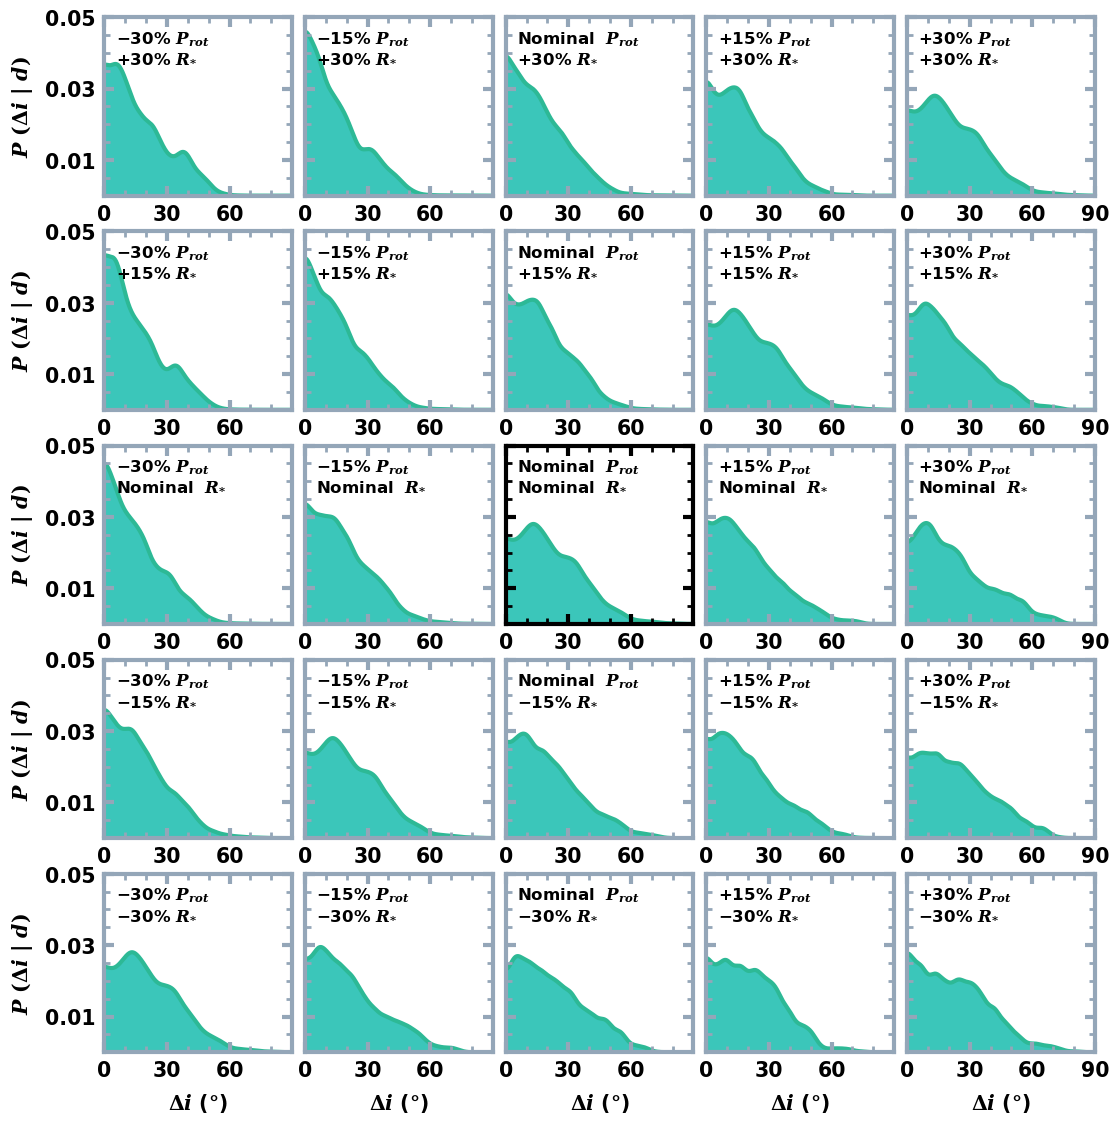

In [22]:
# compute_new_posteriors = False

# save_csv_file = True
# if compute_new_posteriors == False:
#     save_csv_file = False


axnum = 0

figure_width = 11.9
figure_height = 11.25

fig = plt.figure(figsize=(figure_width, figure_height))
gs = gridspec.GridSpec(5, 6, width_ratios=[1, 1, 1, 1, 1, 0.17])  # , wspace=0.17, hspace=0.17)
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(5) for jj in range(5)]


font_size_5x5 = 1.05*font_size


for R_shift in R_shifts:
    for P_shift in P_shifts:

        Rshift_text = 'Rshift' + str(R_shift)
        Pshift_text = 'Pshift' + str(P_shift)
    
        if plot_special_axis == True:
            if axnum not in special_axes:
                axnum += 1
                continue
        
        ax = axes[axnum]

        ax.minorticks_on()


        csv_save_string = 'Primordial_Disks_5x5_TestGrid_' + resolution_text + '_' + z_colors_text + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv'

        print('Reading condensed csv file: ', csv_save_string)

        
        condensed_df = pd.read_csv(primordial_disks_sample_directory + csv_save_string)


        exclude_objects = []
        if len(exclude_objects) > 0:
            for object_i in exclude_objects:
                condensed_df = condensed_df[condensed_df['Simbad Name'] != object_i]


        

        if axnum >= 20:
            ax.set_xlabel(r'$\Delta i$ ($\degree$)', fontsize=font_size_5x5, labelpad=7.5)
        if np.mod(axnum, 5) == 0:
            ax.set_ylabel(r'$P$ $(\Delta i$ | $d)$', fontsize=font_size_5x5, labelpad=7.5)


        R_percent = -int(np.ceil((1 - R_shift) * 100))
        P_percent = -int(np.ceil((1 - P_shift) * 100))
        
        R_percent = int(np.round(R_percent / 5) * 5)
        P_percent = int(np.round(P_percent / 5) * 5)

        if R_percent < 0:
            R_text = r'$-$' + str(abs(R_percent)) + '%' + r' $R_{*}$'
        if R_percent > 0:
            R_text = '+' + str(abs(R_percent)) + '%' + r' $R_{*}$'
        if R_percent == 0:
            R_text = 'Nominal ' + r' $R_{*}$'
        if P_percent < 0:
            P_text = r'$-$' + str(abs(P_percent)) + '%' + r' $P_{rot}$'
        if P_percent > 0:
            P_text = '+' + str(abs(P_percent)) + '%' + r' $P_{rot}$'
        if P_percent == 0:
            P_text = 'Nominal ' + r' $P_{rot}$'








        
        # -------------------------------- COMPUTE AND PLOT KDE -------------------------------- # 


        band_width = 2
        if P_shift > R_shift:
            band_width = 3
        number_of_draws = int(1e3)
        do_MAPs = False
        do_mirror = True
        smooth_on = False

        smooth_over_deg = 4  # 1.7  # deg


        if axnum == 0:
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print('KDE Bandwidth = ', band_width)
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('axnum: ', int(axnum+1))


        physicals = []



        if axnum + 1 in nominal_axnums:
            nominal_df = pd.read_csv(nominal_kde_file)

            density_estimation = nominal_df['density_estimation'].values
            all_posterior_i_values = nominal_df['all_posterior_i_values'].values
            posterior_i_values = all_posterior_i_values[all_posterior_i_values >= 0]

            density_estimation_mirrored = density_estimation[::-1]

            if do_mirror == True:
                density_estimation_total = density_estimation + density_estimation_mirrored
            else:
                density_estimation_total = density_estimation
            
            density_estimation_total_positive_x = density_estimation_total[(all_posterior_i_values >= 0) & (all_posterior_i_values <= 90)]


        else:

            Posteriors = pd.read_csv(distribution_dir + 'Posteriors_5x5_CXTau_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv')
            posterior_i_values = Posteriors['i (deg)'].values
            x_grid = np.array(posterior_i_values).reshape(-1, 1)

            reverse_posterior_i_values = -posterior_i_values[::-1][:-1]
            all_posterior_i_values = np.concatenate((np.array(reverse_posterior_i_values), np.array(posterior_i_values)))
            x_grid_all = np.array(all_posterior_i_values).reshape(-1, 1)


            data_for_kde = []
            for targetnum in range(len(condensed_df['Simbad Name'].values)):

                target_str = condensed_df['Simbad Name'].values[targetnum].replace(' ', '')
                if '/' in condensed_df['Simbad Name'].values[targetnum]:
                    target_str = target_str.replace('/', '-')

                if do_MAPs == False:
                    if target_str not in non_physicals[axnum]:
                        physicals.append(target_str)
                        
                        Posteriors = pd.read_csv(distribution_dir + 'Posteriors_5x5_' + target_str + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv')
                        P_Delta_i_target = np.array(Posteriors['P(Delta i | d)'].values)
                        data_for_kde.extend(choices(posterior_i_values, P_Delta_i_target, k=number_of_draws))
                else:
                    if target_str not in non_physicals[axnum]:
                        physicals.append(target_str)
                        targ_temp_df = condensed_df[condensed_df['disk diff'].values == condensed_df['Simbad Name'].values[targetnum]]
                        data_for_kde.append(targ_temp_df['disk diff'].values[0])

            data_for_kde = np.array(data_for_kde).reshape(-1, 1)
            
            # print('len(non_physicals[axnum]):', len(non_physicals[axnum]))
            # print('len(physicals)', len(physicals))

            kde = KernelDensity(kernel='gaussian', bandwidth=band_width).fit(data_for_kde)
            log_density = kde.score_samples(x_grid_all)
            density_estimation = np.array(np.exp(log_density))

            density_estimation_mirrored = density_estimation[::-1]

            if do_mirror == True:
                density_estimation_total = density_estimation + density_estimation_mirrored
            else:
                density_estimation_total = density_estimation

            density_estimation_total_positive_x = density_estimation_total[(all_posterior_i_values >= 0) & (all_posterior_i_values <= 90)]

        x_grid_plot = all_posterior_i_values[(all_posterior_i_values >= 0) & (all_posterior_i_values <= 90)]
        dx = np.diff(x_grid_plot)[0]

        print('dx: ', dx)

        if smooth_on == True:
            density_estimation_total_positive_x[0] = np.mean(density_estimation_total_positive_x[1:10])
            print('smooth over: ', smooth_over_deg, 'deg')
            smooth_over_points = int(smooth_over_deg / dx)
            if np.mod(smooth_over_points, 2) != 0:
                smooth_over_points += 1
            smooth_vals_i_diff = gaussian_filter1d(density_estimation_total_positive_x, smooth_over_points)  # , mode='nearest')
            density_estimation_total_positive_x = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * dx)
        else:
            density_estimation_total_positive_x = density_estimation_total_positive_x / (sum(density_estimation_total_positive_x) * dx)


        plot_mirror_test = False
        if (plot_mirror_test == True) and (axnum + 1 == 5):

            fig_temp = plt.figure()
            ax_temp = fig_temp.add_subplot(111)
            ax_temp.fill_between(all_posterior_i_values, density_estimation, alpha=0.44, zorder=0)
            ax_temp.fill_between(all_posterior_i_values[::-1], density_estimation, alpha=0.44, zorder=0)
            ax_temp.plot(all_posterior_i_values, density_estimation_total, color='#000000', lw=2.5, alpha=0.44, zorder=1)
            ax_temp.plot(posterior_i_values, density_estimation_total_positive_x, color='#000000', lw=3.5, alpha=1, zorder=1)
            ax_temp.plot([0, 0], [0, density_estimation_total_positive_x[0]], color='#000000', lw=3.5, alpha=1, zorder=1)
            ax_temp.set_title('axnum: ' + str(int(axnum+1)))
            ax_temp.set_xlim(-20, max(all_posterior_i_values))
            ax_temp.set_ylim(0, 0.04)
            fig_temp.show()

        
        kde_line_color = '#6666ff'  # '#bf4080'  # '#6fdcc1'
        kde_fill_color = '#611470'  # '#b34db3'  # '#bf4080'  # '#7a1f7a'  # '#54478a'  # '#6fdcdc'

        kde_line_color = '#2db996'  # '#6fdcc1'
        kde_fill_color = '#26c0b3'  # '#6fdcdc'

        # kde_fill_color = '#9966ff'  # '#b34db3'  # '#bf4080'  # '#7a1f7a'  # '#54478a'  # '#6fdcdc'
        # kde_line_color = '#611470'  # '#bf4080'  # '#6fdcc1'


        ax.plot(x_grid_plot, density_estimation_total_positive_x, color=kde_line_color, lw=3, zorder=-1)
        ax.fill_between(x_grid_plot, density_estimation_total_positive_x, color=kde_fill_color, alpha=0.9, zorder=-2)


        # ------------------- INSERT GRID CELL FACE TEXT ------------------- # 
        grid_text = P_text + '\n' + R_text
        ax.text(0.06, 0.73, grid_text, horizontalalignment='left', verticalalignment='bottom', fontsize=12, transform=ax.transAxes)


        ymin, ymax = 0, 0.05
        ax.set_xlim(0, 90)
        ax.set_ylim(ymin, ymax)


        if target_labels_on == True:
            for par_xi, var_x in enumerate(parameter_x):
                ax.text(parameter_x[par_xi], parameter_y[par_xi]+np.random.uniform(0.5, 1.5, 1)[0], targets_list[par_xi], horizontalalignment='center', verticalalignment='bottom', fontsize=8)  # , transform=ax.transAxes)


        stupid_ytickvals = np.arange(0.01, ymax + 0.02, 0.02)
        ytickvals = [round(stupid_ytick, 2) for stupid_ytick in stupid_ytickvals]
        ax.set_yticks(ytickvals)
        if np.mod(axnum, 5) != 0:
            ax.set_yticklabels([])
        else:
            ax.set_yticklabels(ytickvals, fontsize=font_size_5x5)

        if np.mod(axnum + 1, 5) == 0:
            xtickvals = np.arange(0, 90 + 30, 30)
        else:
            xtickvals = np.arange(0, 90, 30)
        xticks = [int(xtick) for xtick in xtickvals]
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks, fontsize=font_size_5x5)
        
        minor_locator = AutoMinorLocator(3)
        ax.xaxis.set_minor_locator(minor_locator)

        ax.tick_params(pad=6)

        ax.set_rasterized(True)

        # if (R_shift == 1.0) and (P_shift == 1.0):
        #     face_color = '#cc8800'
        #     ax.patch.set_facecolor(face_color)
        #     ax.patch.set_alpha(0.08) 

        if (R_shift == 1.0) and (P_shift == 1.0):
            spine_color = '#000000'
        else:
            spine_color = '#94a6b8'  # '#5c738a'  # '#47596b'

        for spine in ax.spines.values():
            spine.set_edgecolor(spine_color)
            

        ax.tick_params(which='minor', length=4, width=2, color=spine_color)
        ax.tick_params(which='major', length=7, width=3, color=spine_color)  
        
        axnum += 1


fig.subplots_adjust(left=0.11, bottom=0.06, right=0.98, top=0.98, wspace=0.08, hspace=0.20)


# SAVE THE FIGURE
testgrid_save_string = '5x5_TestGrid_KDEs_' + resolution_text + '_' + z_colors_text + '_' + light_or_dark_dext + '_' + transparent_text + '_'  + date_str + '.pdf'

if save_final_figure == True:
    if plot_transparent == True:
        fig.savefig(test_figures_directory + testgrid_save_string, dpi=300, transparent=True)
    else:
        fig.savefig(test_figures_directory + testgrid_save_string, dpi=300, transparent=False)


plt.show()

In [143]:
np.random.seed(4)
lenbep = 3
array_nans = []
for bep_i in range(lenbep):
    boop = np.arange(0., 20, 1)
    put_nan = np.random.randint(0, len(boop), 4)
    boop[put_nan] = float('nan')
    array_nans.append(boop)

# where_nan = np.argwhere(np.isnan(bep))
# print(np.transpose(where_nan))
# elements = np.arange(0, len(bep[0]), 1)
# print(elements)


# Make a copy just in case you need the original for degugging or something
array_nonans = np.copy(array_nans)

for array_i, temp_array in enumerate(array_nans):
    nans, args = np.isnan(temp_array), lambda z: z.nonzero()[0]
    array_nonans[array_i][args(nans)] = np.interp(x=args(nans), xp=args(~nans), fp=temp_array[~nans])

print(array_nans)
print(' ')
print(array_nonans)


[array([ 0., nan,  2.,  3.,  4., nan,  6.,  7., nan,  9., 10., 11., 12.,
       13., nan, 15., 16., 17., 18., 19.]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., nan, nan, nan, 10., 11., 12.,
       13., 14., 15., 16., 17., nan, 19.]), array([ 0.,  1.,  2.,  3., nan,  5.,  6.,  7., nan,  9., 10., 11., 12.,
       nan, 14., 15., 16., 17., nan, 19.])]
 
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19.]]


In [530]:
# for bep in condensed_df.index:
#     if condensed_df['i star (deg)'][condensed_df.index == bep].values[0] == 90.:
#         # print(condensed_df['Target'][condensed_df.index == bep].values[0])
#         print(condensed_df[condensed_df.index == bep])


# f = open(primordial_disks_directory+'Primordial_Disks_Targets_' + date_str + '.txt', 'w')
# for bep in range(len(condensed_df['Simbad Name'].values)):
#     f.write(condensed_df['Simbad Name'].values[bep] + ', ')
# f.close()

# f = open(primordial_disks_directory+'Primordial_Disks_RAandDEC_' + date_str + '.txt', 'w')
# for bep in range(len(condensed_df['RA'].values)):
#     f.write(condensed_df['RA'].values[bep] + ' ' + condensed_df['DEC'].values[bep] + ', ')
# f.close()

In [531]:
print('These targets need vsinis: ')
for targ_i, targ in enumerate(condensed_df['Target'].values):
      temp_df = condensed_df[condensed_df['Target'] == targ]
      # if (temp_df['SpType'].values[0] < Sptype_cutoff):
      if (np.isnan(temp_df['Prot (d)'].values[0]) == False) and (np.isnan(temp_df['vsini (km/s)'].values[0]) == True):
            RA_split = temp_df['RA'].values[0].split(' ')
            DEC_split = temp_df['DEC'].values[0].split(' ')
            line_str = RA_split[0] + ':' + RA_split[1] + ':' + RA_split[2] + ' ' + DEC_split[0] + ':' + DEC_split[1] + ':' + DEC_split[2] + ' ' + temp_df['Simbad Name'].values[0].replace(' ', '')
            print(line_str)

print('\n\nThese targets need rotation periods: ')
for targ_i, targ in enumerate(condensed_df['Target'].values):
      temp_df = condensed_df[condensed_df['Target'] == targ]
      # if (temp_df['SpType'].values[0] < Sptype_cutoff):
      if (np.isnan(temp_df['Prot (d)'].values[0]) == True) and (np.isnan(temp_df['vsini (km/s)'].values[0]) == False):
            RA_split = temp_df['RA'].values[0].split(' ')
            DEC_split = temp_df['DEC'].values[0].split(' ')
            line_str = RA_split[0] + ':' + RA_split[1] + ':' + RA_split[2] + ' ' + DEC_split[0] + ':' + DEC_split[1] + ':' + DEC_split[2] + ' ' + temp_df['Simbad Name'].values[0].replace(' ', '')
            print(line_str)

These targets need vsinis: 


These targets need rotation periods: 


In [319]:
# # Make sure that we are not duplicating any targets that may have been mistaken as two seperate objects but are really 1 object that's referred to by different names

# matching_names = []
# for _, targ1 in enumerate(condensed_df['Simbad Name']):
#     for _, targ2 in enumerate(condensed_df['Simbad Name']):
#         temp_df = condensed_df[condensed_df['Target'] == targ2]
#         if targ1 != targ2:
#             targ2_altnames = temp_df['all IDs'].values
#             for _, targ2_alt in enumerate(targ2_altnames):
#                 if targ1 in targ2_alt:
#                     matching_names.append([targ1, targ2, targ2_altnames])

# if len(matching_names) == 0:
#     print('No duplicate objects.')
# else:
#     for match in matching_names:
#         print(match)


In [ ]:
# def mode_pm_highest_density_interval(x, pdf_y, sigma=0.6826):

#     # Compute the CDF
#     cdf_y = np.cumsum(pdf_y)[:-1]
#     cdf_y /= cdf_y[-1]
#     cdf_y = np.append(0, cdf_y)

#     # Compute the mode
#     mode = np.array(x)[pdf_y == max(pdf_y)][0]

#     # Compute potential intervals
#     yrange_max = sigma
#     stepnum = 0
#     stepsize = 0.1
#     x2 = []
#     x1 = []
#     steps = []
#     while yrange_max <= 1:
#         yrange_min = stepnum*stepsize
#         yrange_max = stepnum*stepsize + sigma
#         xrange = x[(np.array(cdf_y) >= yrange_min) & (np.array(cdf_y) <= yrange_max)]
#         if len(xrange) > 0:
#             x2.append(xrange[-1])
#             x1.append(xrange[0])
#         else:
#             x2.append(float('nan'))
#             x1.append(float('nan'))
        
#         steps.append(stepnum)
#         stepnum += 1

#     x2 = np.array(x2)
#     x1 = np.array(x1)
#     steps = np.array(steps)

#     # Select minimum credible interval
#     delta_x = x2 - x1
#     min_step = steps[delta_x == min(delta_x)]

#     # print(steps, delta_x)
#     # plt.scatter(steps, delta_x)

#     lower_bound = x1[min_step][0]
#     upper_bound = x2[min_step][0]

#     lower = mode - lower_bound
#     upper = upper_bound - mode

#     if mode == 90:
#         upper = 0
#     if mode == 0:
#         lower = 0


#     return mode, lower, upper